In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
data = {
    'height':[
    163,
    163,
    174,
    173,
    179,
    164,
    194,
    175,
    179,
    164,
    173,
    162,
    173,
    172.5,
    167,
    164,
    163,
    175,
    165,
    176,
    163,
    176,
    161,
    173,
    185,
    193,
    180,
    185,
    190,
    166,
    180,
    178,
    176,
    165,
    178,
    186,
    177,
    172,
],
'shoe_size':[
    38,
    41,
    40,
    39,
    42.5,
    39,
    46,
    43,
    43,
    37,
    40,
    37,
    40,
    39.5,
    39,
    38,
    37,
    43,
    40,
    39,
    38.5,
    42,
    39,
    42,
    43,
    44,
    44,
    45,
    45,
    38,
    41,
    42.5,
    42,
    38,
    40,
    42,
    45,
    39,
],
 'sex':[
    1,
    0,
    1,
    1,
    0,
    1,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    0,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
    1,
    1,
    0,
    0,
    1,
    1,
    0,
    0,
    1,
 ]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.shape

(38, 3)

In [ ]:
2df.head()

,height,shoe_size,sex
0,163.0,38.0,1
1,163.0,41.0,0
2,174.0,40.0,1
3,173.0,39.0,1
4,179.0,42.5,0


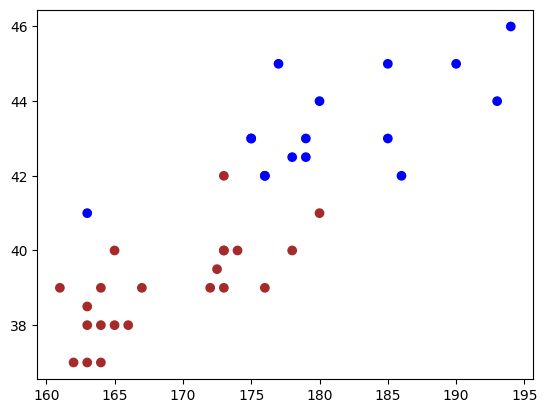

In [ ]:
colors = {1:'brown', 0:'blue'}

# scatter plot
plt.scatter(df["height"], df["shoe_size"], c=df['sex'].apply(lambda x: colors[x]))

# Display the plot
plt.show()

# linear SVM

In [ ]:
# features and target
X = df[['height','shoe_size']]
y = df['sex']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=39)

# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with training data
clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Check the accuracy of the classifier
print('Accuracy: ', accuracy_score(y_test, y_pred))

NameError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



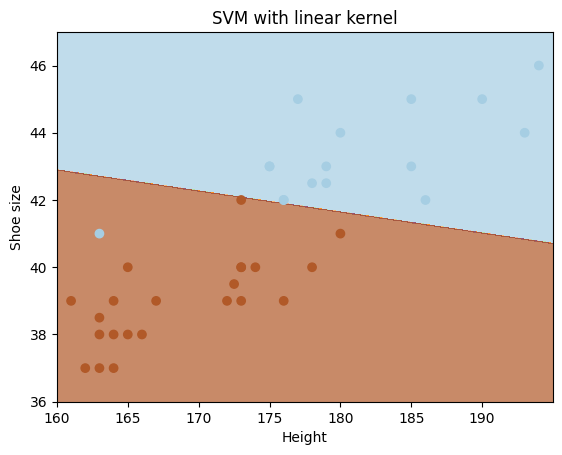

In [ ]:
# Create a mesh to plot in
x_min = X['height'].min() - 1
x_max =  X['height'].max() + 1

x2_min = X['shoe_size'].min() - 1
x2_max = X['shoe_size'].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(x2_min, x2_max, h))

plt.subplot(1, 1, 1)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.7)

plt.scatter(X['height'], X['shoe_size'], c=y, cmap=plt.cm.Paired)
plt.xlabel('Height')
plt.ylabel('Shoe size')
plt.xlim(xx.min(), xx.max())
plt.title('SVM with linear kernel')
plt.show()

# Non linear SVM

In [ ]:
non_linear_clf = svm.SVC(kernel='rbf', gamma='auto')

# Train the classifier with training data
non_linear_clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = non_linear_clf.predict(X_test)

# Check the accuracy of the classifier
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



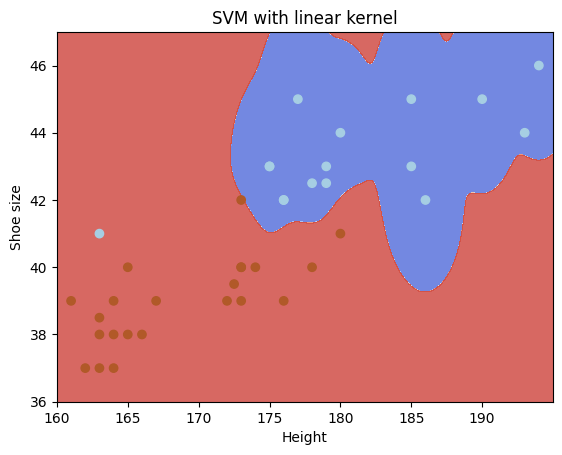

In [ ]:
# Create a mesh to plot in
plt.subplot(1, 1, 1)
Z = non_linear_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X['height'], X['shoe_size'], c=y, cmap=plt.cm.Paired)
plt.xlabel('Height')
plt.ylabel('Shoe size')
plt.xlim(xx.min(), xx.max())
plt.title('SVM with linear kernel')
plt.show()

# Inspect training data

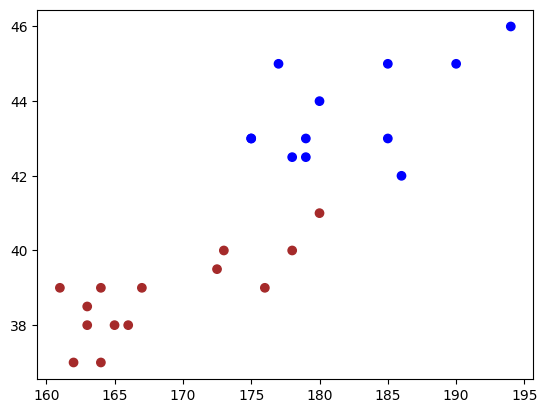

In [ ]:
plt.scatter(X_train['height'], X_train['shoe_size'],c=y_train.apply(lambda x: colors[x]))
plt.show()